<a href="https://colab.research.google.com/github/manjunathsirur1994/Time_series_forecasting/blob/main/Exponential_smoothening_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import yfinance as yf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import pandas as pd
from sklearn.metrics import mean_squared_error
import math

In [106]:
ticker = 'GOOG'

df = yf.download(ticker, start='2020-01-01', multi_level_index=False)
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,68.201012,68.368500,68.406998,67.077499,67.077499,28132000
2020-01-03 00:00:00+00:00,67.866325,68.032997,68.625000,67.277199,67.392998,23728000
2020-01-06 00:00:00+00:00,69.539726,69.710503,69.824997,67.500000,67.500000,34646000
2020-01-07 00:00:00+00:00,69.496330,69.667000,70.149498,69.518997,69.897003,30054000
2020-01-08 00:00:00+00:00,70.043991,70.216003,70.579002,69.542000,69.603996,30560000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1223 entries, 2020-01-02 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1223 non-null   float64
 1   Close      1223 non-null   float64
 2   High       1223 non-null   float64
 3   Low        1223 non-null   float64
 4   Open       1223 non-null   float64
 5   Volume     1223 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.9 KB


In [108]:
df = df[['Close']]
df.head()

,Close
Date,
2020-01-02 00:00:00+00:00,68.368500
2020-01-03 00:00:00+00:00,68.032997
2020-01-06 00:00:00+00:00,69.710503
2020-01-07 00:00:00+00:00,69.667000
2020-01-08 00:00:00+00:00,70.216003


In [109]:
df = df.resample('B').last()
df = df.fillna(method = 'bfill')
df['Close'] = pd.to_numeric(df['Close'])
df.isna().sum()

<ipython-input-109-ffd5032a5207>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


,0
Close,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2020-01-02 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1267 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [111]:
df.shape

(1267, 1)

In [112]:
df_train = df.head(1200)
df_test = df.tail(67)

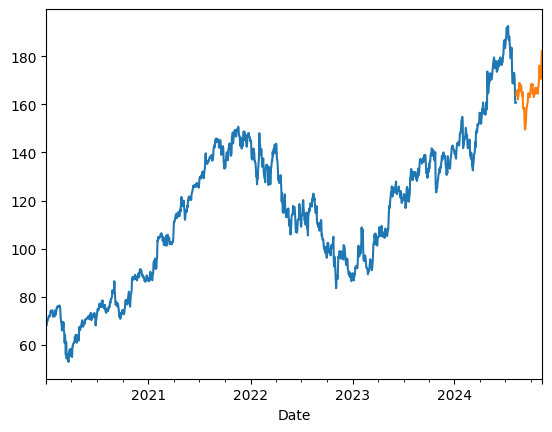

In [113]:
df_train['Close'].plot();
df_test['Close'].plot();

In [114]:
model = SimpleExpSmoothing(df_train['Close'])
model_fit = model.fit(smoothing_level=0.2)

holt_model = Holt(df_train['Close'])
holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.01)

holt_winters_model = ExponentialSmoothing(df_train['Close'])
holt_winters_model_fit = holt_winters_model.fit(smoothing_level=0.2, smoothing_slope=0.05, smoothing_seasonal=0.05)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-114-15661ea50ca8>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.05)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-114-15661ea50ca8>:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_winters_model_fit = holt_winters_model.fit(smoothing_level=0.2, smoothing_slope=0.05, smoothing_seasonal=0.05)


In [115]:
y_pred = model_fit.forecast(67)
y_pred_holt = holt_model_fit.forecast(67)
y_pred_holt_winters = holt_winters_model_fit.forecast(67)

In [118]:
print(mean_squared_error(df_test['Close'], y_pred))
print(mean_squared_error(df_test['Close'], y_pred_holt))
print(mean_squared_error(df_test['Close'], y_pred_holt_winters))

39.89655273422755
832.4386611209142
39.89655273422755


In [119]:
print(math.sqrt(mean_squared_error(df_test['Close'], y_pred)))
print(math.sqrt(mean_squared_error(df_test['Close'], y_pred_holt)))
print(math.sqrt(mean_squared_error(df_test['Close'], y_pred_holt_winters)))

6.316371801455923
28.85201312076705
6.316371801455923


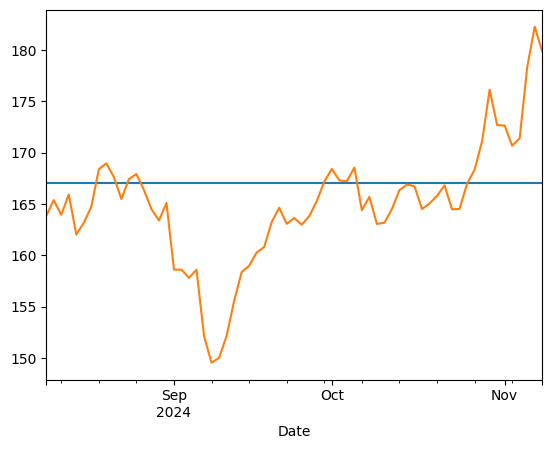

In [120]:
y_pred.plot();
df_test['Close'].plot();

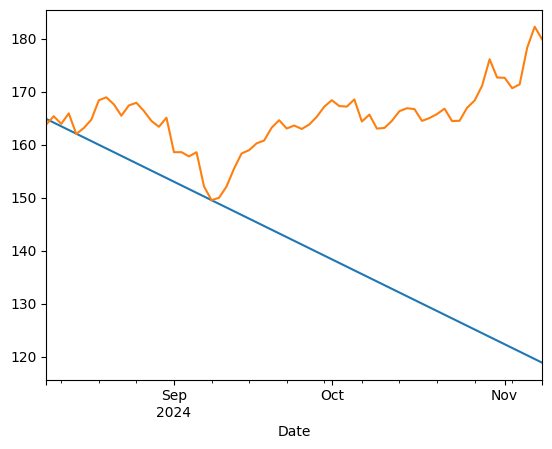

In [121]:
y_pred_holt.plot();
df_test['Close'].plot();

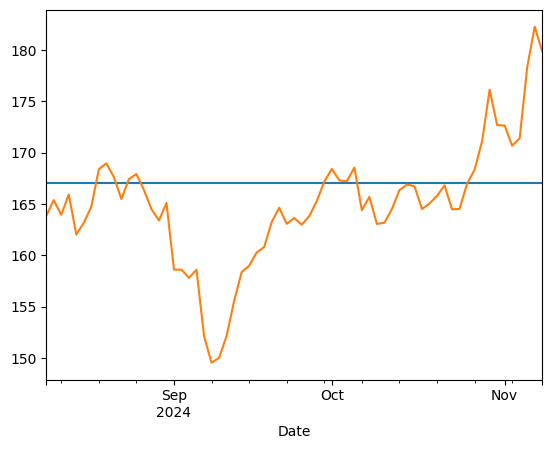

In [122]:
y_pred_holt_winters.plot();
df_test['Close'].plot();

In [128]:
df['Close_diff'] = df['Close'].diff()
df.head()

,Close,Close_diff
Date,,
2020-01-03 00:00:00+00:00,68.032997,NaN
2020-01-06 00:00:00+00:00,69.710503,1.677505
2020-01-07 00:00:00+00:00,69.667000,-0.043503
2020-01-08 00:00:00+00:00,70.216003,0.549004
2020-01-09 00:00:00+00:00,70.991501,0.775497


In [129]:
df.dropna(inplace=True)
df.shape

(1265, 2)

In [130]:
df_train = df.head(1200)
df_test = df.tail(66)

In [131]:
df_train.head()

,Close,Close_diff
Date,,
2020-01-06 00:00:00+00:00,69.710503,1.677505
2020-01-07 00:00:00+00:00,69.667000,-0.043503
2020-01-08 00:00:00+00:00,70.216003,0.549004
2020-01-09 00:00:00+00:00,70.991501,0.775497
2020-01-10 00:00:00+00:00,71.486504,0.495003


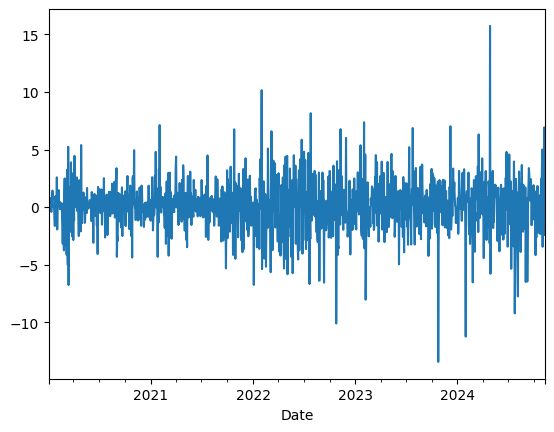

In [132]:
df['Close_diff'].plot();

In [133]:
model = SimpleExpSmoothing(df_train['Close_diff'])
model_fit = model.fit(smoothing_level=0.2)

holt_model = Holt(df_train['Close_diff'])
holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.01)

holt_winters_model = ExponentialSmoothing(df_train['Close_diff'])
holt_winters_model_fit = holt_winters_model.fit(smoothing_level=0.2, smoothing_slope=0.05, smoothing_seasonal=0.05)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-133-d727ba27b7c9>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.01)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-133-d727ba27b7c9>:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_winters_model_fit = holt_winters_model.fit(smoothing_level=0.2, smoothing_slope=0.05, smoothing_seasonal=0.05)


In [137]:
y_pred = model_fit.forecast(66)
y_pred_holt = holt_model_fit.forecast(66)
y_pred_holt_winters = holt_winters_model_fit.forecast(66)

In [138]:
print(mean_squared_error(df_test['Close_diff'], y_pred))
print(mean_squared_error(df_test['Close_diff'], y_pred_holt))
print(mean_squared_error(df_test['Close_diff'], y_pred_holt_winters))

5.785163061968645
6.01831958294534
5.785163061968645


In [140]:
print(math.sqrt(mean_squared_error(df_test['Close_diff'], y_pred)))
print(math.sqrt(mean_squared_error(df_test['Close_diff'], y_pred_holt)))
print(math.sqrt(mean_squared_error(df_test['Close_diff'], y_pred_holt_winters)))

2.4052365916825407
2.453226361945701
2.4052365916825407


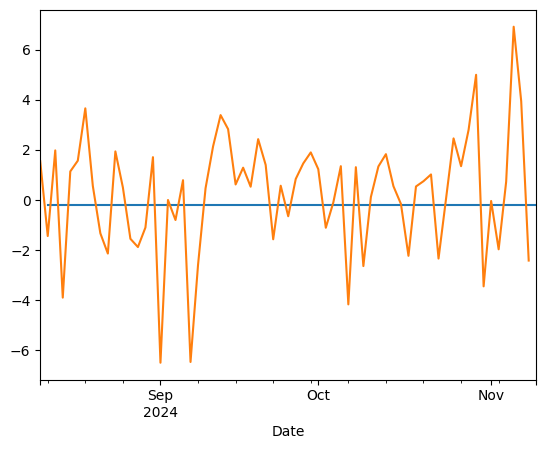

In [142]:
y_pred.plot();
df_test['Close_diff'].plot();

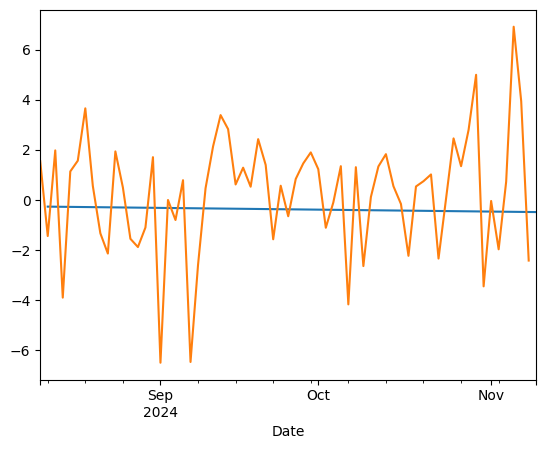

In [143]:
y_pred_holt.plot();
df_test['Close_diff'].plot();

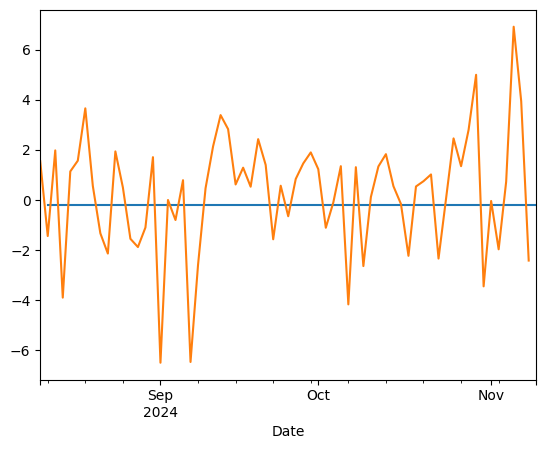

In [144]:
y_pred_holt_winters.plot();
df_test['Close_diff'].plot();